In [1]:
token = 'AgAAAAAUU2fzAAZCUgs9ZOhQbUPRhhNcMVv4HA4'
headers = {'Authorization': 'OAuth ' + token}
params = {'metrics': 'ym:s:visits', 
          'dimensions': 'ym:s:lastsignTrafficSource,ym:s:isRobot,ym:s:hour',  
          'date1': '2016-01-01',  
          'date2': '2019-07-01',     
          'ids': 30177909,
          'accuracy':'full',
         'limit':100000}

In [33]:
import json 
import requests
from pprint import pprint
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
response = requests.get('https://api-metrika.yandex.net/stat/v1/data', params=params, headers=headers)
print (response.status_code)
metrika_data = response.json()
print(metrika_data.keys())

200
dict_keys(['query', 'data', 'total_rows', 'total_rows_rounded', 'sampled', 'sample_share', 'sample_size', 'sample_space', 'data_lag', 'totals', 'min', 'max'])


In [4]:
print(metrika_data['total_rows'])

236


In [5]:
pprint(metrika_data['data'][0:5])
metrika_df = pd.DataFrame(metrika_data['data'])
display(metrika_df.head(10))

[{'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': 'no', 'name': 'People'},
                 {'id': '15', 'name': '15:00'}],
  'metrics': [3959.0]},
 {'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': 'no', 'name': 'People'},
                 {'id': '16', 'name': '16:00'}],
  'metrics': [3902.0]},
 {'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
                  'name': 'Search engine traffic'},
                 {'id': 'no', 'name': 'People'},
                 {'id': '14', 'name': '14:00'}],
  'metrics': [3767.0]},
 {'dimensions': [{'icon_id': '2',
                  'icon_type': 'traffic-source',
                  'id': 'organic',
      

,dimensions,metrics
0,"[{'name': 'Search engine traffic', 'icon_id': ...",[3959.0]
1,"[{'name': 'Search engine traffic', 'icon_id': ...",[3902.0]
2,"[{'name': 'Search engine traffic', 'icon_id': ...",[3767.0]
3,"[{'name': 'Search engine traffic', 'icon_id': ...",[3756.0]
4,"[{'name': 'Search engine traffic', 'icon_id': ...",[3710.0]
5,"[{'name': 'Search engine traffic', 'icon_id': ...",[3637.0]
6,"[{'name': 'Search engine traffic', 'icon_id': ...",[3592.0]
7,"[{'name': 'Search engine traffic', 'icon_id': ...",[3228.0]
8,"[{'name': 'Search engine traffic', 'icon_id': ...",[3100.0]
9,"[{'name': 'Search engine traffic', 'icon_id': ...",[2674.0]


In [6]:
def getMetrikaDataInListOfDicts(metrika_data):
    list_of_dicts = []
    dimensions_list = metrika_data['query']['dimensions']
    metrics_list = metrika_data['query']['metrics']
    for data_item in metrika_data['data']:
        d = {}
        for i,dimension in enumerate(data_item['dimensions']):
            d[dimensions_list[i]] = dimension['name']
        for i,metric in enumerate(data_item['metrics']):
            d[metrics_list[i]] = metric
        list_of_dicts.append(d)
    return list_of_dicts

In [7]:
metrika_list_of_dicts = getMetrikaDataInListOfDicts(metrika_data)
pprint(metrika_list_of_dicts[0:5])

[{'ym:s:hour': '15:00',
  'ym:s:isRobot': 'People',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:visits': 3959.0},
 {'ym:s:hour': '16:00',
  'ym:s:isRobot': 'People',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:visits': 3902.0},
 {'ym:s:hour': '14:00',
  'ym:s:isRobot': 'People',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:visits': 3767.0},
 {'ym:s:hour': '12:00',
  'ym:s:isRobot': 'People',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:visits': 3756.0},
 {'ym:s:hour': '11:00',
  'ym:s:isRobot': 'People',
  'ym:s:lastsignTrafficSource': 'Search engine traffic',
  'ym:s:visits': 3710.0}]


In [8]:
metrika_df = pd.DataFrame(metrika_list_of_dicts)
metrika_df = metrika_df.dropna()
display(metrika_df.head(10))

,ym:s:lastsignTrafficSource,ym:s:isRobot,ym:s:hour,ym:s:visits
0,Search engine traffic,People,15:00,3959.0
1,Search engine traffic,People,16:00,3902.0
2,Search engine traffic,People,14:00,3767.0
3,Search engine traffic,People,12:00,3756.0
4,Search engine traffic,People,11:00,3710.0
5,Search engine traffic,People,13:00,3637.0
6,Search engine traffic,People,17:00,3592.0
7,Search engine traffic,People,10:00,3228.0
8,Search engine traffic,People,18:00,3100.0
9,Search engine traffic,People,19:00,2674.0


In [9]:
print(metrika_df.shape)

(236, 4)


In [10]:
metrika_df['ym:s:date'] = pd.to_datetime(metrika_df['ym:s:hour'])
metrika_df['ym:s:visits'] = metrika_df['ym:s:visits'].astype(int)

In [54]:
#переименуем столбцы
a =[]
for col in metrika_df.columns:
    a.append(col.replace('ym:s:',''))
metrika_df.columns = a
display(metrika_df.head())

,lastsignTrafficSource,isRobot,hour,visits,date
0,Search engine traffic,People,15:00,3959,2020-04-12 15:00:00
1,Search engine traffic,People,16:00,3902,2020-04-12 16:00:00
2,Search engine traffic,People,14:00,3767,2020-04-12 14:00:00
3,Search engine traffic,People,12:00,3756,2020-04-12 12:00:00
4,Search engine traffic,People,11:00,3710,2020-04-12 11:00:00


In [48]:
counter = metrika_df['isRobot'].value_counts()
print(counter)
perc_robots = counter[1] / (counter[0] + counter[1])
print('\nПроцент роботов:', '{:.1%}'.format(perc_robots))
print('Процент реальных посетителей:', '{:.1%}'.format(1 - perc_robots))

People    150
Robots     86
Name: isRobot, dtype: int64

Процент роботов: 36.4%
Процент реальных посетителей: 63.6%


### Количество посещений реальных людей и роботов

In [57]:
counter_traffic = metrika_df.groupby('isRobot')['visits'].sum()
print(counter_traffic)
perc_robots_traffic = counter_traffic[1] / (counter_traffic[1] + counter_traffic[0])
print('\nПроцент траффика роботов:', '{:.1%}'.format(perc_robots_traffic))
print('Процент траффика реальных пользователей:', '{:.1%}'.format(1 - perc_robots_traffic))

isRobot
People    67101
Robots     2777
Name: visits, dtype: int32

Процент траффика роботов: 4.0%
Процент траффика реальных пользователей: 96.0%


### Какие источники трафика содержат бОльшую долю роботов?

In [14]:
pivot_df = metrika_df.pivot_table(index = 'lastsignTrafficSource', columns = 'isRobot', values = 'visits', aggfunc = 'sum')
pivot_df['Robots traffic part, %'] = (pivot_df['Robots'] / (pivot_df['People'] + pivot_df['Robots'])) * 100
pivot_df = pivot_df.dropna()

In [15]:
display(pivot_df)

isRobot,People,Robots,"Robots traffic part, %"
lastsignTrafficSource,,,
Direct traffic,7366.0,1830.0,19.899957
Internal traffic,225.0,8.0,3.433476
Link traffic,1561.0,32.0,2.008788
Search engine traffic,55219.0,861.0,1.535307
Social network traffic,2656.0,46.0,1.702443


### В какое время роботы чаще посещают ресурс?

In [16]:
pivot_df_time = metrika_df.pivot_table(index = 'hour', columns = 'isRobot', values = 'visits', aggfunc = 'sum')
pivot_df_time_robots = pd.DataFrame(pivot_df_time['Robots'])
pivot_df_time_robots = round(pivot_df_time_robots / pivot_df_time_robots.sum() * 100, 2)
pivot_df_time_robots.columns = ['Robots, %']
display(pivot_df_time_robots)

,"Robots, %"
hour,
00:00,3.42
01:00,2.99
02:00,3.78
03:00,2.38
04:00,3.10
05:00,3.35
06:00,2.59
07:00,2.81
08:00,3.42


### Процент трафика роботов с распределением по времени

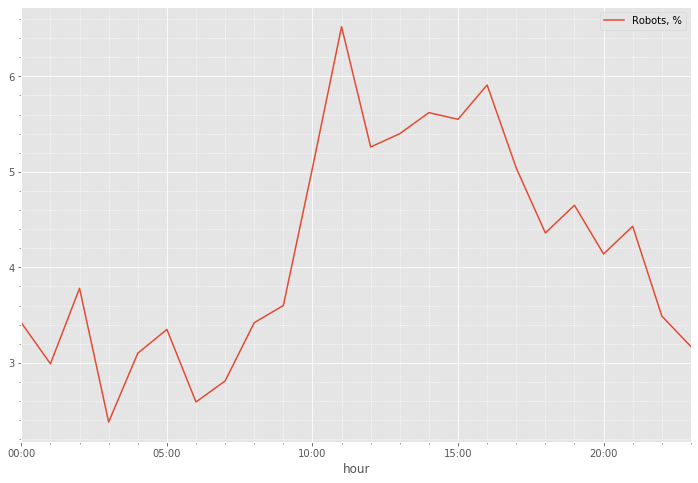

In [45]:
plt.style.use('ggplot')
pivot_df_time_robots.plot(y = 'Robots, %', figsize = (12, 8))
plt.grid(True, axis = 'x')
plt.minorticks_on()
plt.grid(which = 'minor', linestyle = ':')
plt.show()

### Выводы:
1. Доля трафика роботов по всем источникам - 4,0 % (2777 посещений)
2. НаибОльшую часть траффика роботов содержит Direct traffic, порядка 20 % от всего траффика по Direct traffic - роботы.
3. Наибольший трафик роботов наблюдается в период: с 10:00 - 17:00, более 5 % от всего трафика роботов.